In [228]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("merged_covid_data_final.csv")

df.head()

df["Cumulative_deaths"]

0      7947
1      3604
2      6881
3       159
4      1936
       ... 
185    2159
186    4069
187    5718
188    5708
189    5708
Name: Cumulative_deaths, Length: 190, dtype: int64

In [229]:


# set df_small["Population"].isna() to 0


df["Population"] = df["Population"].str.replace(",", "")

df["Population"] = df["Population"].fillna(0)

df["Population"]

df["Population"] = df["Population"].astype(int)

df["cases_per_population"] = df["Cumulative_cases"] / df["Population"]

df["cases_per_milion"] = (df["Cumulative_cases"] / df["Population"]) * 1000000
df["deaths_per_milion"] = (df["Cumulative_deaths"] / df["Population"]) * 100000
df["proportion_of_deaths"] = (df["Cumulative_deaths"] / df["cases_per_milion"])


df["cases_per_milion_2020"] = (df["Accumulated Cases 2020"] / df["Population"]) * 1000000
df["cases_per_milion_2021"] = (df["Accumulated Cases 2021"] / df["Population"]) * 1000000
df["cases_per_milion_2022"] = (df["Accumulated Cases 2022"] / df["Population"]) * 1000000

df["Deaths_per_milion_2020"] = (df["Accumulated Deaths 2020"] / df["Population"]) * 100000
df["Deaths_per_milion_2021"] = (df["Accumulated Deaths 2021"] / df["Population"]) * 100000
df["Deaths_per_milion_2022"] = (df["Accumulated Deaths 2022"] / df["Population"]) * 100000

df.drop([134, 163, 182, 188], inplace=True)

df_small = df[["Date_reported", "Country", "New_cases", "Cumulative_cases", "New_deaths", "Cumulative_deaths", "Population", "cases_per_population", "cases_per_milion", "cases_per_milion_2020", "cases_per_milion_2021", "cases_per_milion_2022", "Deaths_per_milion_2020", "Deaths_per_milion_2021", "Deaths_per_milion_2022", "deaths_per_milion", "proportion_of_deaths"]]


C:\Users\ander\AppData\Local\Temp\ipykernel_11396\3597621847.py:38: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


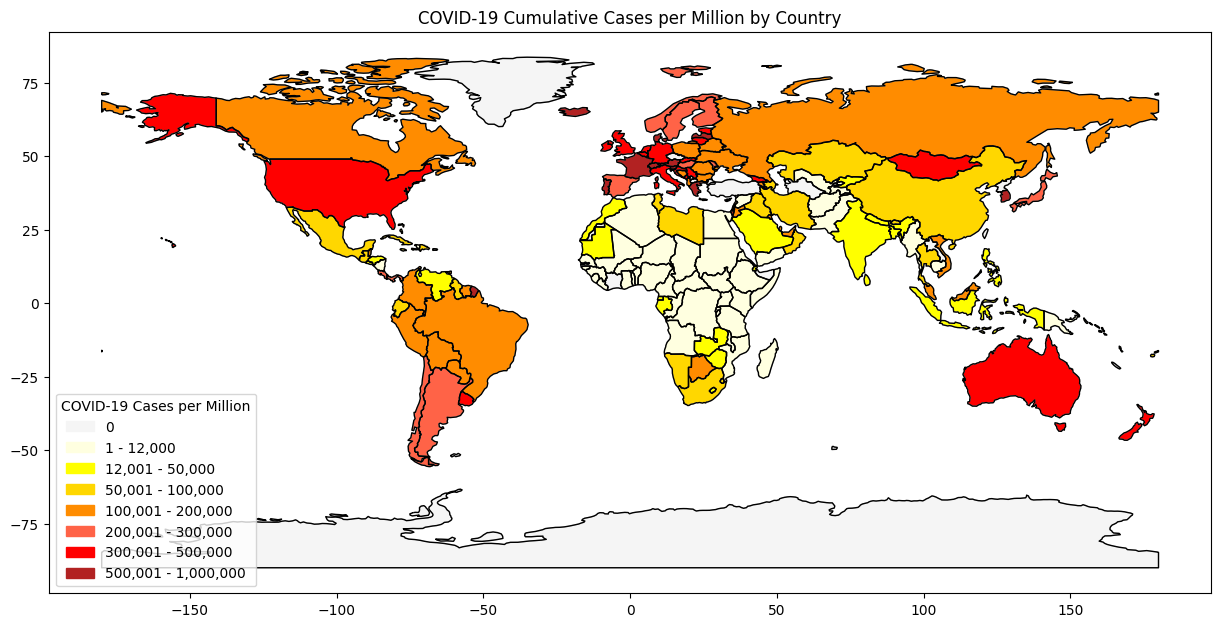

In [230]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Carregar e agregar dados de COVID-19
covid_data = df_small

agg_data = covid_data.groupby('Country').max()['cases_per_milion'].reset_index()

# Normalizar nomes dos países
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Brunei Darussalam': 'Brunei',
    'Central African Republic': 'Central African Rep.',
    "Côte d’Ivoire": "Côte d'Ivoire",
    'Democratic Republic of the Congo': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Equatorial Guinea': 'Eq. Guinea',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'North Macedonia': 'Macedonia',
    'Republic of Moldova': 'Moldova',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'South Sudan': 'S. Sudan',
    'Syrian Arab Republic': 'Syria',
    'The United Kingdom': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Eswatini': 'eSwatini',
    'Türkiye': 'Turkey'
}

agg_data['Normalized_Country'] = agg_data['Country'].apply(lambda x: country_mapping.get(x, x))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.set_index('name').join(agg_data.set_index('Normalized_Country'))

# Bins, labels, and colors
bins = [-1, 0, 12000, 50000, 100000, 200000, 300000, 500000, 1000000, float('inf')]
labels = ['0', '1 - 12,000', '12,001 - 50,000', '50,001 - 100,000', '100,001 - 200,000', 
          '200,001 - 300,000', '300,001 - 500,000', '500,001 - 1,000,000', '> 1,000,000']
color_map_updated = {
    '0': 'whitesmoke',
    '1 - 12,000': 'lightyellow',
    '12,001 - 50,000': 'yellow',
    '50,001 - 100,000': 'gold',
    '100,001 - 200,000': 'darkorange',
    '200,001 - 300,000': 'tomato',
    '300,001 - 500,000': 'red',
    '500,001 - 1,000,000': 'firebrick',
}

# color_map_updated = {
#     '0': 'whitesmoke',
#     '1 - 12,000': 'lightblue',
#     '12,001 - 50,000': 'deepskyblue',
#     '50,001 - 100,000': 'limegreen',
#     '100,001 - 200,000': 'yellow',
#     '200,001 - 300,000': 'darkorange',
#     '300,001 - 500,000': 'red',
#     '500,001 - 1,000,000': 'darkred'
# }

# Define classes and apply color map
merged_data['class'] = pd.cut(merged_data['cases_per_milion'], bins=bins, labels=labels)
merged_data['class_color'] = merged_data['class'].map(color_map_updated)
merged_data['class_color'].fillna('whitesmoke', inplace=True)

# Generate the heat map
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='k')
merged_data.plot(color=merged_data['class_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Add legend
legend_labels = [mpatches.Patch(color=color, label=label) for label, color in color_map_updated.items()]
plt.legend(handles=legend_labels, title='COVID-19 Cases per Million', loc='lower left')

plt.title('COVID-19 Cumulative Cases per Million by Country')
plt.show()

C:\Users\ander\AppData\Local\Temp\ipykernel_11396\373862296.py:38: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


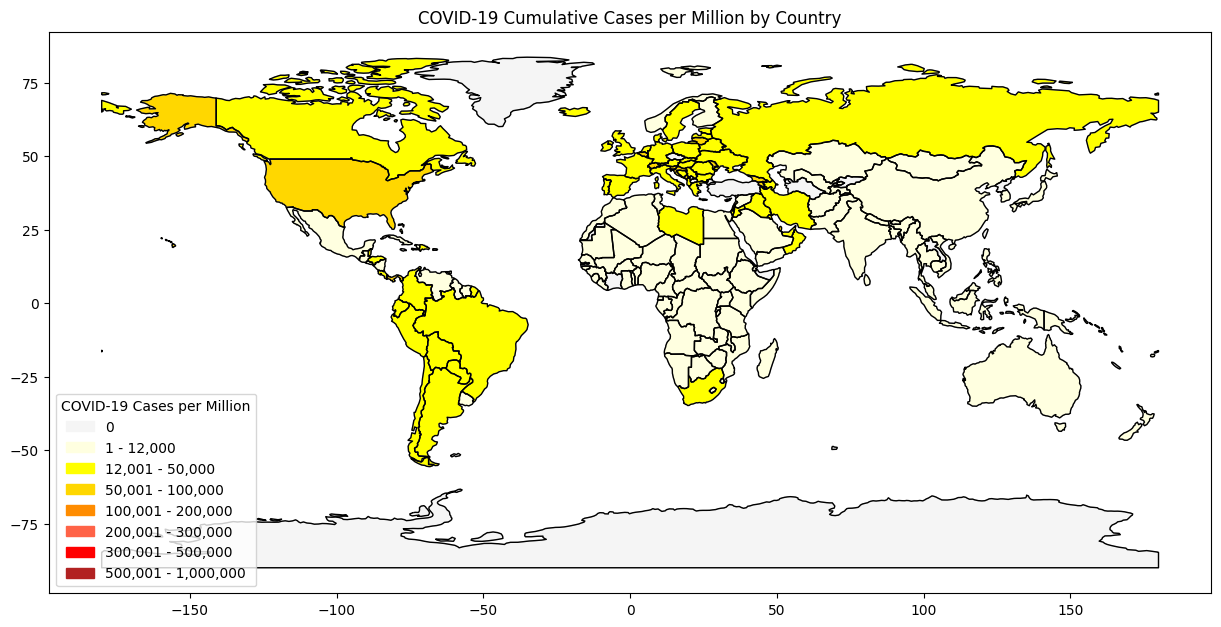

In [231]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Carregar e agregar dados de COVID-19
covid_data = df_small

agg_data = covid_data.groupby('Country').max()['cases_per_milion_2020'].reset_index()

# Normalizar nomes dos países
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Brunei Darussalam': 'Brunei',
    'Central African Republic': 'Central African Rep.',
    "Côte d’Ivoire": "Côte d'Ivoire",
    'Democratic Republic of the Congo': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Equatorial Guinea': 'Eq. Guinea',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'North Macedonia': 'Macedonia',
    'Republic of Moldova': 'Moldova',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'South Sudan': 'S. Sudan',
    'Syrian Arab Republic': 'Syria',
    'The United Kingdom': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Eswatini': 'eSwatini',
    'Türkiye': 'Turkey'
}

agg_data['Normalized_Country'] = agg_data['Country'].apply(lambda x: country_mapping.get(x, x))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.set_index('name').join(agg_data.set_index('Normalized_Country'))

# Bins, labels, and colors
bins = [-1, 0, 12000, 50000, 100000, 200000, 300000, 500000, 1000000, float('inf')]
labels = ['0', '1 - 12,000', '12,001 - 50,000', '50,001 - 100,000', '100,001 - 200,000', 
          '200,001 - 300,000', '300,001 - 500,000', '500,001 - 1,000,000', '> 1,000,000']
color_map_updated = {
    '0': 'whitesmoke',
    '1 - 12,000': 'lightyellow',
    '12,001 - 50,000': 'yellow',
    '50,001 - 100,000': 'gold',
    '100,001 - 200,000': 'darkorange',
    '200,001 - 300,000': 'tomato',
    '300,001 - 500,000': 'red',
    '500,001 - 1,000,000': 'firebrick',
}

# color_map_updated = {
#     '0': 'whitesmoke',
#     '1 - 12,000': 'lightblue',
#     '12,001 - 50,000': 'deepskyblue',
#     '50,001 - 100,000': 'limegreen',
#     '100,001 - 200,000': 'yellow',
#     '200,001 - 300,000': 'darkorange',
#     '300,001 - 500,000': 'red',
#     '500,001 - 1,000,000': 'darkred'
# }

# Define classes and apply color map
merged_data['class'] = pd.cut(merged_data['cases_per_milion_2020'], bins=bins, labels=labels)
merged_data['class_color'] = merged_data['class'].map(color_map_updated)
merged_data['class_color'].fillna('whitesmoke', inplace=True)

# Generate the heat map
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='k')
merged_data.plot(color=merged_data['class_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Add legend
legend_labels = [mpatches.Patch(color=color, label=label) for label, color in color_map_updated.items()]
plt.legend(handles=legend_labels, title='COVID-19 Cases per Million', loc='lower left')

plt.title('COVID-19 Cumulative Cases per Million by Country')
plt.show()

C:\Users\ander\AppData\Local\Temp\ipykernel_11396\3069611471.py:38: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


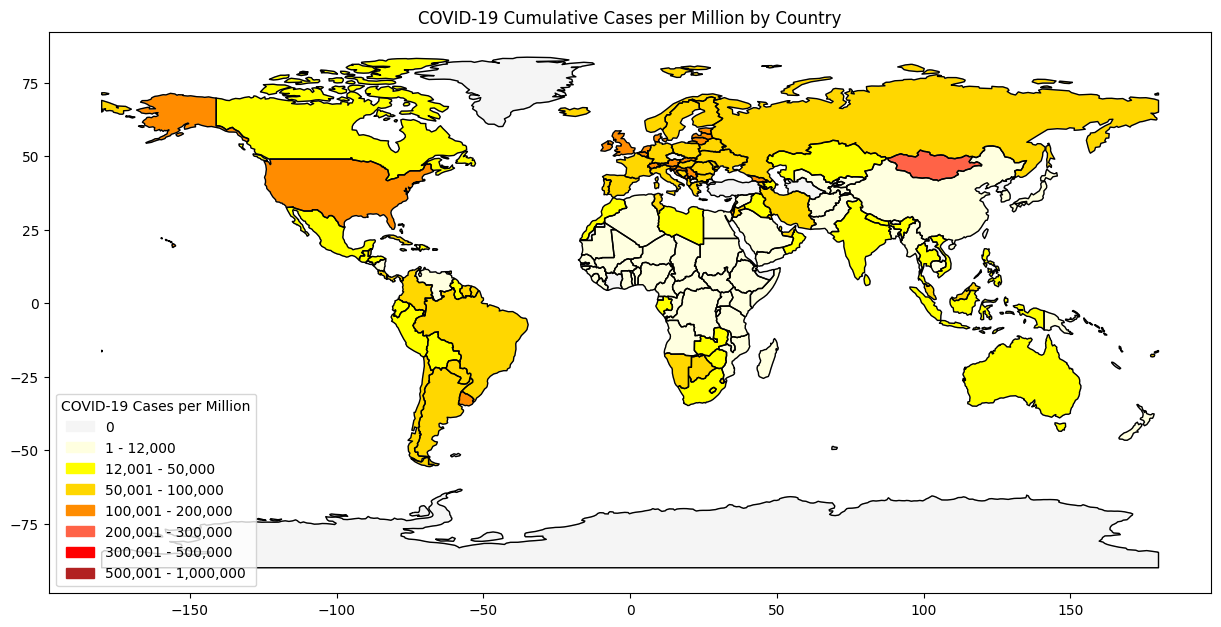

In [232]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Carregar e agregar dados de COVID-19
covid_data = df_small

agg_data = covid_data.groupby('Country').max()['cases_per_milion_2021'].reset_index()

# Normalizar nomes dos países
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Brunei Darussalam': 'Brunei',
    'Central African Republic': 'Central African Rep.',
    "Côte d’Ivoire": "Côte d'Ivoire",
    'Democratic Republic of the Congo': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Equatorial Guinea': 'Eq. Guinea',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'North Macedonia': 'Macedonia',
    'Republic of Moldova': 'Moldova',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'South Sudan': 'S. Sudan',
    'Syrian Arab Republic': 'Syria',
    'The United Kingdom': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Eswatini': 'eSwatini',
    'Türkiye': 'Turkey'
}

agg_data['Normalized_Country'] = agg_data['Country'].apply(lambda x: country_mapping.get(x, x))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.set_index('name').join(agg_data.set_index('Normalized_Country'))

# Bins, labels, and colors
bins = [-1, 0, 12000, 50000, 100000, 200000, 300000, 500000, 1000000, float('inf')]
labels = ['0', '1 - 12,000', '12,001 - 50,000', '50,001 - 100,000', '100,001 - 200,000', 
          '200,001 - 300,000', '300,001 - 500,000', '500,001 - 1,000,000', '> 1,000,000']
color_map_updated = {
    '0': 'whitesmoke',
    '1 - 12,000': 'lightyellow',
    '12,001 - 50,000': 'yellow',
    '50,001 - 100,000': 'gold',
    '100,001 - 200,000': 'darkorange',
    '200,001 - 300,000': 'tomato',
    '300,001 - 500,000': 'red',
    '500,001 - 1,000,000': 'firebrick',
}

# color_map_updated = {
#     '0': 'whitesmoke',
#     '1 - 12,000': 'lightblue',
#     '12,001 - 50,000': 'deepskyblue',
#     '50,001 - 100,000': 'limegreen',
#     '100,001 - 200,000': 'yellow',
#     '200,001 - 300,000': 'darkorange',
#     '300,001 - 500,000': 'red',
#     '500,001 - 1,000,000': 'darkred'
# }

# Define classes and apply color map
merged_data['class'] = pd.cut(merged_data['cases_per_milion_2021'], bins=bins, labels=labels)
merged_data['class_color'] = merged_data['class'].map(color_map_updated)
merged_data['class_color'].fillna('whitesmoke', inplace=True)

# Generate the heat map
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='k')
merged_data.plot(color=merged_data['class_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Add legend
legend_labels = [mpatches.Patch(color=color, label=label) for label, color in color_map_updated.items()]
plt.legend(handles=legend_labels, title='COVID-19 Cases per Million', loc='lower left')

plt.title('COVID-19 Cumulative Cases per Million by Country')
plt.show()

C:\Users\ander\AppData\Local\Temp\ipykernel_11396\1208795382.py:38: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


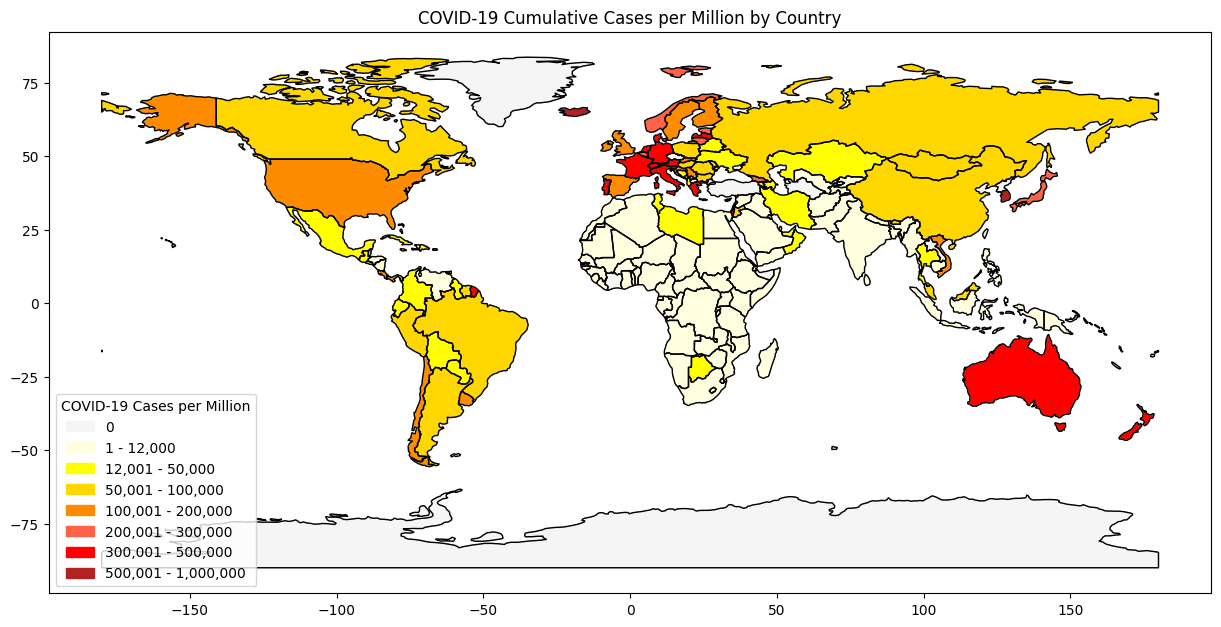

In [233]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Carregar e agregar dados de COVID-19
covid_data = df_small

agg_data = covid_data.groupby('Country').max()['cases_per_milion_2022'].reset_index()

# Normalizar nomes dos países
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Brunei Darussalam': 'Brunei',
    'Central African Republic': 'Central African Rep.',
    "Côte d’Ivoire": "Côte d'Ivoire",
    'Democratic Republic of the Congo': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Equatorial Guinea': 'Eq. Guinea',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'North Macedonia': 'Macedonia',
    'Republic of Moldova': 'Moldova',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'South Sudan': 'S. Sudan',
    'Syrian Arab Republic': 'Syria',
    'The United Kingdom': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Eswatini': 'eSwatini',
    'Türkiye': 'Turkey'
}

agg_data['Normalized_Country'] = agg_data['Country'].apply(lambda x: country_mapping.get(x, x))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.set_index('name').join(agg_data.set_index('Normalized_Country'))

# Bins, labels, and colors
bins = [-1, 0, 12000, 50000, 100000, 200000, 300000, 500000, 1000000, float('inf')]
labels = ['0', '1 - 12,000', '12,001 - 50,000', '50,001 - 100,000', '100,001 - 200,000', 
          '200,001 - 300,000', '300,001 - 500,000', '500,001 - 1,000,000', '> 1,000,000']
color_map_updated = {
    '0': 'whitesmoke',
    '1 - 12,000': 'lightyellow',
    '12,001 - 50,000': 'yellow',
    '50,001 - 100,000': 'gold',
    '100,001 - 200,000': 'darkorange',
    '200,001 - 300,000': 'tomato',
    '300,001 - 500,000': 'red',
    '500,001 - 1,000,000': 'firebrick',
}

# color_map_updated = {
#     '0': 'whitesmoke',
#     '1 - 12,000': 'lightblue',
#     '12,001 - 50,000': 'deepskyblue',
#     '50,001 - 100,000': 'limegreen',
#     '100,001 - 200,000': 'yellow',
#     '200,001 - 300,000': 'darkorange',
#     '300,001 - 500,000': 'red',
#     '500,001 - 1,000,000': 'darkred'
# }

# Define classes and apply color map
merged_data['class'] = pd.cut(merged_data['cases_per_milion_2022'], bins=bins, labels=labels)
merged_data['class_color'] = merged_data['class'].map(color_map_updated)
merged_data['class_color'].fillna('whitesmoke', inplace=True)

# Generate the heat map
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='k')
merged_data.plot(color=merged_data['class_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Add legend
legend_labels = [mpatches.Patch(color=color, label=label) for label, color in color_map_updated.items()]
plt.legend(handles=legend_labels, title='COVID-19 Cases per Million', loc='lower left')

plt.title('COVID-19 Cumulative Cases per Million by Country')
plt.show()

In [234]:
df_small["proportion_of_deaths"].max()

16.15556518971175

C:\Users\ander\AppData\Local\Temp\ipykernel_11396\811845678.py:38: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


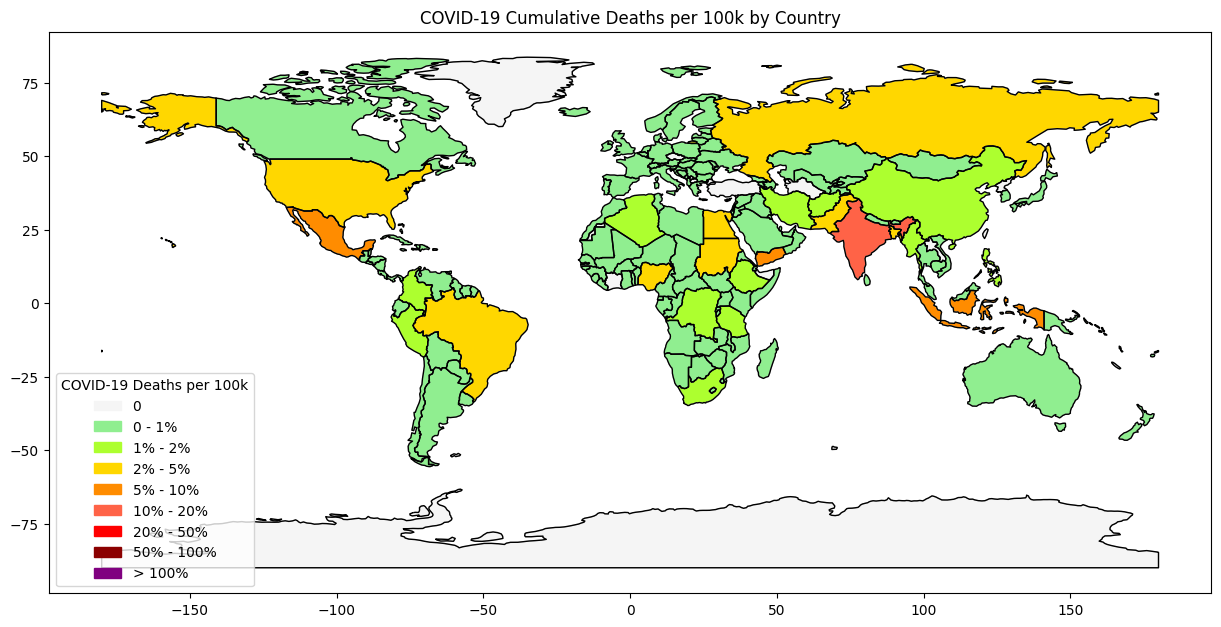

In [235]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Carregar e agregar dados de COVID-19
covid_data = df_small

agg_data = covid_data.groupby('Country').max()['proportion_of_deaths'].reset_index()

# Normalizar nomes dos países
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia and Herz.',
    'Brunei Darussalam': 'Brunei',
    'Central African Republic': 'Central African Rep.',
    "Côte d’Ivoire": "Côte d'Ivoire",
    'Democratic Republic of the Congo': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'Equatorial Guinea': 'Eq. Guinea',
    'Iran (Islamic Republic of)': 'Iran',
    "Lao People's Democratic Republic": 'Laos',
    'North Macedonia': 'Macedonia',
    'Republic of Moldova': 'Moldova',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'South Sudan': 'S. Sudan',
    'Syrian Arab Republic': 'Syria',
    'The United Kingdom': 'United Kingdom',
    'United Republic of Tanzania': 'Tanzania',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Eswatini': 'eSwatini',
    'Türkiye': 'Turkey'
}

agg_data['Normalized_Country'] = agg_data['Country'].apply(lambda x: country_mapping.get(x, x))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.set_index('name').join(agg_data.set_index('Normalized_Country'))

# Bins, labels, and colors
bins = [-1, 0, 1, 2, 5, 10, 20, 50, 100, float('inf')]
labels = ['0', '0 - 1%', '1% - 2%', '2% - 5%', '5% - 10%', '10% - 20%', '20% - 50%', '50% - 100%', '> 100%']
color_map_updated = {
    '0': 'whitesmoke',
    '0 - 1%': 'lightgreen',
    '1% - 2%': 'greenyellow',
    '2% - 5%': 'gold',
    '5% - 10%': 'darkorange',
    '10% - 20%': 'tomato',
    '20% - 50%': 'red',
    '50% - 100%': 'darkred',
    '> 100%': 'purple'
}
# color_map_updated = {
#     '0': 'whitesmoke',
#     '1 - 12,000': 'lightblue',
#     '12,001 - 50,000': 'deepskyblue',
#     '50,001 - 100,000': 'limegreen',
#     '100,001 - 200,000': 'yellow',
#     '200,001 - 300,000': 'darkorange',
#     '300,001 - 500,000': 'red',
#     '500,001 - 1,000,000': 'darkred'
# }

# Define classes and apply color map
merged_data['class'] = pd.cut(merged_data['proportion_of_deaths'], bins=bins, labels=labels)
merged_data['class_color'] = merged_data['class'].map(color_map_updated)
merged_data['class_color'].fillna('whitesmoke', inplace=True)

# Generate the heat map
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_data.boundary.plot(ax=ax, linewidth=1, color='k')
merged_data.plot(color=merged_data['class_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Add legend
legend_labels = [mpatches.Patch(color=color, label=label) for label, color in color_map_updated.items()]
plt.legend(handles=legend_labels, title='COVID-19 Deaths per 100k', loc='lower left')

plt.title('COVID-19 Cumulative Deaths per 100k by Country')
plt.show()